### סכרת 1 , 2 , ומה שבינהן

מגישים:
  ,  לידור דהרי
  ,  ארז דוד
   , דוד כהן
  ,  רועי פרידמן

Kaggle :קישור ל

https://www.kaggle.com/uciml/pima-indians-diabetes-database

בפרויקט "סכרת 1, 2, ומה שבינהן" נציג נתוני מדדים של נבדקות בסיכון לסכרת בגילאים 21-81 מהודו


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
url = "https://raw.githubusercontent.com/erezdavid/Gmar_project/main/diabetes.csv"
My_data = pd.read_csv(url)
My_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


הדאטה מציג נתוני בדיקות סכרת של נשים בנות 21-81 מהודו. המדדים הם לחץ דם, מדד מסת גוף, עובי עור, כמות אינסולין שהלבלב מייצר, רמת הגלוקוז בדם שעתיים לאחר בדיקת העמסת סוכר, גיל ,תכונות גנטיות תורשתיות שמשפיעות על סכרת ותוצאה בינארית (0 או 1) שאומרת האם יש לנבדקת סכרת או לא 

In [2]:
def check_type(row):
    if row['Insulin'] == 0 and row['Outcome'] == 1:
        return 1
    elif row['Outcome'] == 1:
        return 2
    else:
        return 0

### טבלת קורלציה

<AxesSubplot:>

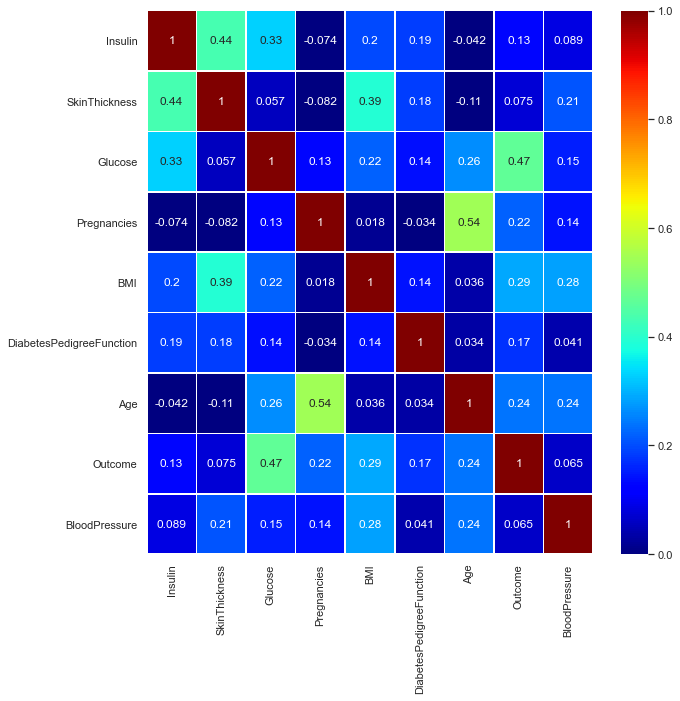

In [3]:
scoreData = My_data[['Insulin' ,'SkinThickness', 'Glucose', 'Pregnancies', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome','BloodPressure']]
plt.figure(figsize = (10,10))
sns.heatmap(scoreData.corr(), vmin=0 , vmax = 1 ,cmap='jet',linewidths=0.5 , annot=True)

בעקבות הטבלה, החלטנו לבחון את הקשר בין רמת הגלוקוז בדם לאחר בדיקת העמסת סוכר לבין הימצאות סכרת אצל הנבדקות

## הקשר בין רמת הגלוקוז לסכרת-

In [4]:
#checking the mean glucose of outcome 1 and 0
outcome1 = My_data[(My_data['Outcome'] == 1)& (My_data['Glucose'] !=0)]
outcome0 = My_data[(My_data['Outcome'] == 0)& (My_data['Glucose'] !=0)]
mean_Glucose_1 = outcome1['Glucose'].mean()
mean_Glucose_0 = outcome0['Glucose'].mean()
mean_Glucose_all = My_data['Glucose'].mean()
print('Mean of everyone is {:.2f} Mean of outcome 1 is {:.2f} and mean of outcome 0 is {:.2f}'.format(mean_Glucose_all,mean_Glucose_1,mean_Glucose_0))

Mean of everyone is 120.89 Mean of outcome 1 is 142.32 and mean of outcome 0 is 110.64


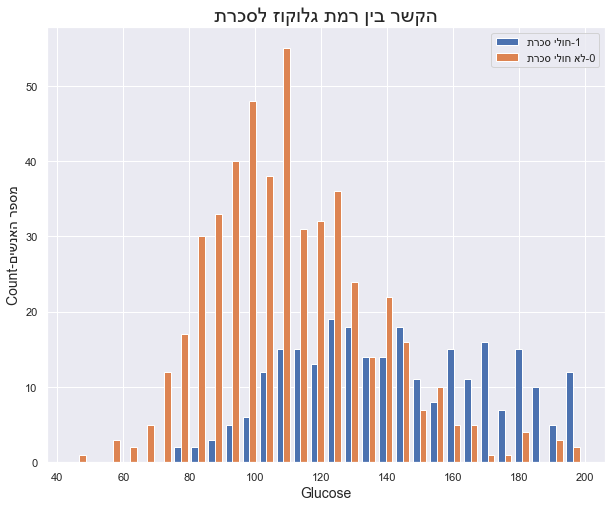

In [5]:
plt.figure(figsize=(10,8))
plt.hist([outcome1['Glucose'],outcome0['Glucose']], bins=30, label=['תרכס ילוח-1','תרכס ילוח אל-0'])
plt.title('תרכסל זוקולג תמר ןיב רשקה',size=20)
plt.legend()
plt.xlabel('Glucose',size=14)
plt.ylabel('Count-םישנאה רפסמ',size=14)
plt.show()

מסקנה : ניתן לראות כי התחום בו מתפלגת רמת הגלוקוז (סוכר) בצורה נורמאלית אצל נבדקים בריאים היא בין 70-130 (מיליגרם לדציליטר),אלו הם נתוני בדיקות תקינים. אך ככל שרמת הגלוקוז בדם עולה, עולה כמות הנבדקים החולים ויורדת כמות הנבדקים הבריאים 

##   אבחון והתפלגות הגילאים של נבדקים בעלי סכרת מסוג 1 

סכרת מסוג 1 נובעת עקב חוסר יכולת של הלבלב לייצר אינסולין



נרצה לבדוק כמה מהנבדקות בעלות סכרת מסוג 1 לפי מדד האינסולין, כאשר הוא 0 והתוצאה הבינארית היא 1 , לנבדקת יש סכרת מסוג 1

In [6]:
type1 = My_data[(My_data['Insulin']==0) & (My_data['Outcome']!=0)]
#checking how much type 1 are there
type1['Age'].count()





138

עולה כי 138 מהנבדקות הן חולות סכרת מסוג 1

כעת נבדוק את התפלגות הגילאים של חולות סכרת מסוג 1

C:\Users\Erez\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


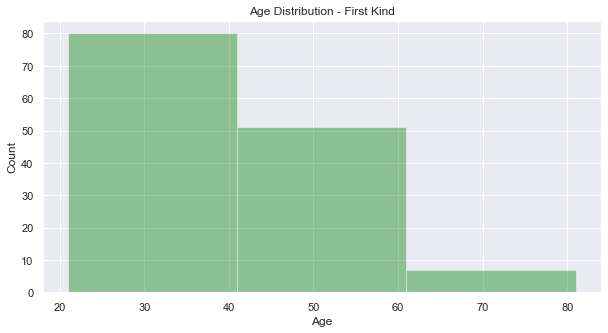

In [7]:
#age hist of type 1
age_bins = np.arange(21,81.5,20)
plt.figure(figsize=(10,5))
plt.title('Age Distribution - First Kind')
age_dist = sns.distplot(type1['Age'],kde=False, bins=age_bins,color="green")
age_dist.set(xlabel='Age', ylabel='Count')
plt.show()

עולה מן הגרף כי כמות החולים בסכרת מסוג 1 היא הגבוהה ביותר בגילאים הצעירים (בין 20-40) וכאשר גילאי החולים עולה, כמות החולים יורדת, 
 
עקב נתון זה ניתנה למחלה השם " סכרת נעורים" , נדגיש כי עדיין קיימות נבדקות בגילאים מבוגרים יותר, אך לא בצורה משמעותית כמו בגילאים הנמוכים  

In [8]:
def check_type(row):
    if row['Insulin'] == 0 and row['Outcome'] == 1:
        return 1
    elif row['Outcome'] == 1:
        return 2
    else:
        return 0

מסקנה: אם לנבדקת אין סכרת מסוג 1 (רמת האינסולין אינה 0) וגם התוצאה הבינארית תהיה 1 , אז אותה נבדקת תהיה חולה בסכרת מסוג"2".
חשוב לציין כי אין דרך רפואית לאבחן סכרת מסוג 2 , אלא רק דרך שלילת סכרת מסוג 1 והימצאות מדדים לא תקינים אצל נבדקת


כעת נבנה פונקציה שתחלק את הנבדקות לפי סוג הסכרת

,סכרת מסוג 1 תסומן ב1
.סכרת מסוג 2 תסומן ב2
.נבדקת בריאה תסומן ב0

הוספנו עמודה שתתאר את סוג הסכרת שנמצאה אצל הנבדק

In [9]:
My_data['DiabetesType'] = My_data.apply(lambda row: check_type(row), axis = 1)
My_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesType
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2
5,5,116,74,0,0,25.6,0.201,30,0,0
6,3,78,50,32,88,31.0,0.248,26,1,2
7,10,115,0,0,0,35.3,0.134,29,0,0
8,2,197,70,45,543,30.5,0.158,53,1,2
9,8,125,96,0,0,0.0,0.232,54,1,1


כעת נציג את התפלגות החולים לפי סוג המחלה

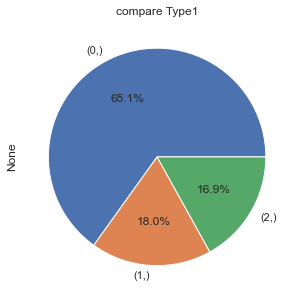

In [10]:
plt.figure(1, figsize=(5,5))
plt.title("compare Type1") 
My_data[["DiabetesType"]].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [11]:
Just_Type_2 = My_data[(My_data['DiabetesType'] == 2) & (My_data['Insulin'] != 0)]
Just_Type_2['DiabetesType'].count()

130

עולה כי 130 נבדקות הן בעלי סכרת מסוג 2

תת מסקנה : רוב הנבדקות נחשבות בריאות, מה שמציג אותן "בסיכון" לסכרת עקב נתוני הסוכר הגבוהים שהוצגו למעלה 

###  חיזוי לפי אלגוריתם לימוד עצמי

בהתאם לנתוני הקובץ ולמסקנות הנ"ל, החלטנו להשתמש באלגוריתם הלימוד העצמי ולנסות לחשב את ההסתברות של נבדקת להימצא חולה סכרת בהינתן מדדי גוף וסוכר  

KNN שם האלגוריתם הוא

האלגוריתם מחשב את המרחק של נקודת נתונים חדשה מכל נקודות הנתונים האחרות,
לאחר מכן הוא בוחר את נקודות הנתונים הקרובות ביותר לאותו קיי,
לבסוף הוא מקצה את נקודת הנתונים למחלקה שאליה משתייכים רוב נקודות הקיי

:בכדי להשוות בין העמודות השונות במדוייק, ננרמל את הערכים 

In [12]:
df_normalized = My_data.copy()
from sklearn import preprocessing
#normalizing the values
df_columns = df_normalized.columns
scaler = preprocessing.MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(df_normalized)
df_normalized = pd.DataFrame(scaled_np_matrix, columns = df_columns)
df_normalized['DiabetesType'] = My_data.apply(lambda row: check_type(row), axis = 1)
df_normalized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesType
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0,2
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0,1


כעת נציג בגרף את החישוב של אותו אלגוריתם ונבחן מתי הוא אופטימלי (הכי גבוה) 

In [13]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X = df_normalized.iloc[:, [1,4,5]].values #features
Y = df_normalized.iloc[:, 9].values
mean_score = []
k_list = list(range(1,31))
for k in k_list:
    #create a new KNN model
    knn = KNeighborsClassifier(n_neighbors = k)
    #Train model using cross-calidation method using 5 groups (cv=5)
    cv_scores = cross_val_score(knn, X, Y, cv=5)
    mean_score.append(np.mean(cv_scores))


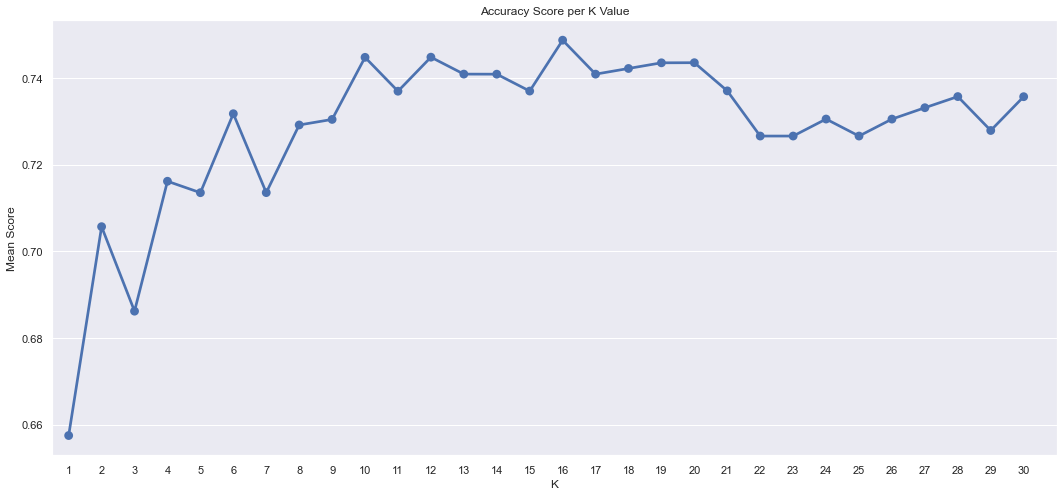

In [14]:
#new df for the k and its' relevant score
k_dict = {"K": k_list, "Mean Score":mean_score}
mean_df = pd.DataFrame(k_dict)
#setting a plot for the mean scores
fig, ax = plt.subplots(figsize=(18,8))
k_plot = sns.pointplot(data = mean_df, x="K", y="Mean Score")
ax.set_xticks(range(0,31))
ax.set(title = "Accuracy Score per K Value")
plt.show()

searcing for the maximal ("best") accuracy value according to K value:

In [15]:
optimal_k = mean_df[mean_df['Mean Score'] == mean_df['Mean Score'].max()]
mean_df[mean_df['Mean Score'] == mean_df['Mean Score'].max()] 

,K,Mean Score
15,16,0.748723


עולה כי כאשר האלגוריתם נמצא בצורתו האופטימלית, ההסתברות לקבלת נבדק חולה בהינתן מדדים היא 0.74

In [16]:
check = df_normalized.iloc[:6, [1,4,5]]
check

,Glucose,Insulin,BMI
0,0.743719,0.000000,0.500745
1,0.427136,0.000000,0.396423
2,0.919598,0.000000,0.347243
3,0.447236,0.111111,0.418778
4,0.688442,0.198582,0.642325
5,0.582915,0.000000,0.381520


In [17]:
rest_of_df = df_normalized[6:]
rest_of_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesType
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0,2
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0,0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0,2
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0,1
10,0.235294,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,0.150000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0,1


In [18]:
optimal_k = 16
knn_model = KNeighborsClassifier(n_neighbors = optimal_k)
X = rest_of_df.iloc[:, [1,4,5]].values #features
Y = rest_of_df.iloc[:, 9].values
knn_model.fit(X,Y)

KNeighborsClassifier(n_neighbors=16)

In [19]:
prediction = knn_model.predict(check)
actual = My_data['DiabetesType'][:6].values
res_dict = {"Actual Type": actual, "Predicted Type":prediction}
res_df = pd.DataFrame(res_dict)
res_df

,Actual Type,Predicted Type
0,1,0
1,0,0
2,1,1
3,0,0
4,2,2
5,0,0


הכנסנו אל הפונקציה שלנו נתונים מהקובץ הקיים ובדקנו האם התוצאות תואמות, נראה כי הפונקציה הצליחה לחזות ב4 מתוך 5 הנבדקים במדויק,
מסקנה : ניתן לבצע חיזוי להימצאות סכרת אצל נבדקות בריאות

אז מה הסקנו מכל הנתונים שבדקנו
מצאנו כי יש קשר ישיר בין רמת גלוקוז גבוהה לבין היותן חולות בסכרת , 
כמו כן , ניתן להבחין בין 2 סוגי הסכרת על פי דרך השלילה של סכרת מסוג 1 
מצוי כי סכרת מסוג 1 שכיחה יותר אצל נבדקות צעירות אך לא מן הנמנע שתימצא בגילאים מבוגרים יותר
כמו כן, ניתן לבדוק את הימצאות הסכרת אצל נבדקות בהסתברות גבוהה בעזרת אלגוריתם הלימוד העצמי 

